<a href="https://colab.research.google.com/github/5234560002ebnida/nonfictioner/blob/main/heart_disease1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### from sklearn.neighbors import KNeighborsClassifier

Url_A_heart="https://raw.githubusercontent.com/5234560002ebnida/nonfictioner/main/heart.csv"


### 자료 불러서 df라고 하자.

df = pd.read_csv(Url_A_heart)

### 자료가 어떻게 생겼나?
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
### 뒤에서 10개

df.tail(n=10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Attribute Information:

Target (0 - no; 1 - yes)

In [98]:
df.info()

### 아래를 보면 없어졌다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [99]:
# checking for missing values (결측치 확인)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [100]:
### 이제 'target'부분을 정답이라고 하자.

y_original = df['target']

In [101]:
y_original.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [102]:
y_original.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [103]:
y_original.unique()

## df['target'].unique()

array([1, 0])

In [104]:
### 값별의 데이터 숫자

y_original.value_counts()

## df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [105]:
## 주어진 dataset을 train-Dset과 test-Dset으로 나누기, 계층의 비율을 유지한 상태로...

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,0:13], y_original,stratify=y_original, random_state=3)

In [106]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2


In [107]:
## Standardization

### Standardization을 합시다.
std = StandardScaler()

### X_train.iloc[:,0:]에서 Standardization에 필요한 정보를 뽑아 준비합시다. 예를 들어 평균과 표준편차를 준비합니다.
std.fit(X_train.iloc[:,0:])

### 앞에서 얻은 정보를 사용하여 X_train.iloc[:,0:]에 적용합니다.

X_train.iloc[:,0:]= std.transform(X_train.iloc[:,0:])

X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
279,0.799661,0.688495,-0.919603,0.357579,-1.660449,-0.441290,-1.024812,-1.207440,1.452442,2.096749,-0.681554,0.278445,-0.476727
264,-0.004046,0.688495,-0.919603,-1.236229,-0.825396,-0.441290,-1.024812,-2.006259,1.452442,-0.860557,-0.681554,0.278445,-0.476727
293,1.488553,0.688495,1.068491,1.154483,-0.700138,-0.441290,-1.024812,-0.032706,-0.688495,-0.203378,-0.681554,-0.724841,1.114699
219,-0.692938,0.688495,-0.919603,-0.097795,0.218420,2.266084,-1.024812,-0.032706,1.452442,-0.860557,0.930038,1.281731,1.114699
2,-1.496646,-1.452442,0.074444,-0.097795,-0.867149,-0.441290,-1.024812,1.001059,-0.688495,0.289506,0.930038,-0.724841,-0.476727


In [108]:
## 평균 0과 표준편차 1로 변형되었나 확인해 볼까요 ?

X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02
mean,1.565072e-16,-9.390433e-17,-3.912680e-17,-6.808064e-16,-1.408565e-16,5.869020e-18,5.086484e-17,5.869020e-17,-1.565072e-17,-7.825361e-17,3.130144e-17,9.390433e-17,-1.389001e-16
std,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00
min,-2.300353e+00,-1.452442e+00,-9.196032e-01,-1.805447e+00,-2.391120e+00,-4.412900e-01,-1.024812e+00,-2.852067e+00,-6.884954e-01,-8.605574e-01,-2.293146e+00,-7.248411e-01,-3.659578e+00
25%,-8.077537e-01,-1.452442e+00,-9.196032e-01,-6.670122e-01,-7.210147e-01,-4.412900e-01,-1.024812e+00,-5.965784e-01,-6.884954e-01,-8.605574e-01,-6.815542e-01,-7.248411e-01,-4.767266e-01
50%,1.107690e-01,6.884954e-01,7.444407e-02,-9.779502e-02,-9.472515e-02,-4.412900e-01,8.820104e-01,1.552511e-01,-6.884954e-01,-3.676730e-01,-6.815542e-01,-7.248411e-01,-4.767266e-01
75%,6.848457e-01,6.884954e-01,1.068491e+00,4.714222e-01,5.837552e-01,-4.412900e-01,8.820104e-01,7.191233e-01,1.452442e+00,4.538011e-01,9.300375e-01,2.784450e-01,1.114699e+00
max,2.636706e+00,6.884954e-01,2.062539e+00,3.886725e+00,3.579507e+00,2.266084e+00,2.788833e+00,2.081814e+00,1.452442e+00,4.232582e+00,9.300375e-01,3.288303e+00,1.114699e+00


In [109]:
### 이것이 중요합니다. test-set에도 train에서 얻은 평균과 표준편차를 사용하여 standadization을 한다.

X_test.iloc[:,0:]= std.transform(X_test.iloc[:,0:])

In [110]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
271,0.799661,0.688495,2.062539,0.129892,-0.240859,-0.44129,0.882010,-0.267653,-0.688495,1.275275,-0.681554,1.281731,-0.476727
302,0.340400,-1.452442,0.074444,-0.097795,-0.199107,-0.44129,-1.024812,1.095038,-0.688495,-0.860557,-0.681554,0.278445,-0.476727
152,1.144107,0.688495,2.062539,2.179074,-0.386994,-0.44129,-1.024812,0.202240,-0.688495,-0.367673,-0.681554,-0.724841,1.114699
86,1.603368,0.688495,1.068491,-0.780856,0.656822,-0.44129,0.882010,0.014283,-0.688495,-0.039083,0.930038,0.278445,1.114699
124,-1.726276,-1.452442,1.068491,-2.146977,-0.971531,-0.44129,0.882010,1.329985,-0.688495,-0.860557,0.930038,-0.724841,-0.476727


In [111]:
## 평균 0과 표준편차 1로 변형되었나 확인해 볼까요 ?
## train dataset의 평균과 표준편차를 사용했으므로 약간 어긋나는 것이 당연합니다.

X_test.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,0.151559,0.040580,0.166001,-0.021400,0.060474,-0.156303,-0.071401,-0.196551,0.043931,-0.026113,-0.151425,0.027624,0.088648
std,1.155129,0.990076,1.091071,0.992967,1.298068,0.836393,1.008996,1.268294,1.022441,0.797471,0.962941,1.100570,0.889072
min,-2.874430,-1.452442,-0.919603,-2.146977,-2.495502,-0.441290,-1.024812,-3.744865,-0.688495,-0.860557,-2.293146,-0.724841,-2.068152
25%,-0.692938,-1.452442,-0.919603,-0.667012,-0.705357,-0.441290,-1.024812,-0.972493,-0.688495,-0.860557,-0.681554,-0.724841,-0.476727
50%,0.340400,0.688495,0.074444,-0.097795,-0.188669,-0.441290,-1.024812,0.014283,-0.688495,-0.039083,-0.681554,-0.724841,-0.476727
75%,0.943180,0.688495,1.068491,0.585266,0.656822,-0.441290,0.882010,0.531166,1.452442,0.453801,0.930038,0.278445,1.114699
max,2.521891,0.688495,2.062539,2.748291,6.648326,2.266084,2.788833,2.410740,1.452442,2.261044,0.930038,3.288303,1.114699


In [112]:
y_train.describe()

count    227.000000
mean       0.546256
std        0.498956
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [113]:
y_test.describe()

count    76.000000
mean      0.539474
std       0.501751
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: target, dtype: float64

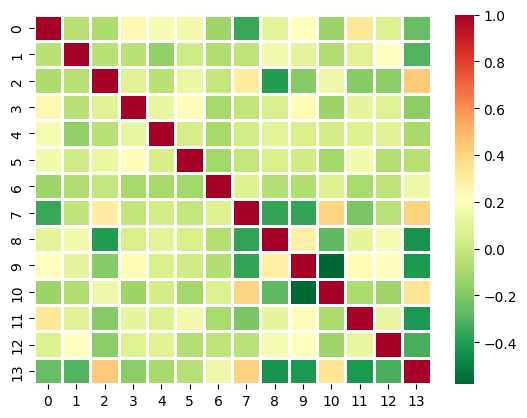

In [132]:
### correlation을 확인해 봅시다.
### 일단 feature와 target값을 합쳐(concatenate) 봅시다.

df_cat = pd.concat([X_train,y_train], axis=1)

corr_mat=np.corrcoef(df_cat,rowvar=False)

sns.heatmap(corr_mat,linewidth=1,cmap='RdYlGn_r')
plt.show()

In [133]:
df_cat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
279,0.799661,0.688495,-0.919603,0.357579,-1.660449,-0.441290,-1.024812,-1.207440,1.452442,2.096749,-0.681554,0.278445,-0.476727,0
264,-0.004046,0.688495,-0.919603,-1.236229,-0.825396,-0.441290,-1.024812,-2.006259,1.452442,-0.860557,-0.681554,0.278445,-0.476727,0
293,1.488553,0.688495,1.068491,1.154483,-0.700138,-0.441290,-1.024812,-0.032706,-0.688495,-0.203378,-0.681554,-0.724841,1.114699,0
219,-0.692938,0.688495,-0.919603,-0.097795,0.218420,2.266084,-1.024812,-0.032706,1.452442,-0.860557,0.930038,1.281731,1.114699,0
2,-1.496646,-1.452442,0.074444,-0.097795,-0.867149,-0.441290,-1.024812,1.001059,-0.688495,0.289506,0.930038,-0.724841,-0.476727,1


In [134]:
### 모양보기

X_train.shape

(227, 13)

## 1. 기본적인 모델


In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()                                                  # 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])  # 딥러닝 모델을 실행합니다.

historyA=model.fit(X_train, y_train, epochs=70, batch_size=16)

Epoch 1/70
15/15 [==============================] - 1s 3ms/step - loss: 0.6965 - binary_accuracy: 0.5066
Epoch 2/70
15/15 [==============================] - 0s 3ms/step - loss: 0.6567 - binary_accuracy: 0.7445
Epoch 3/70
15/15 [==============================] - 0s 3ms/step - loss: 0.6243 - binary_accuracy: 0.8018
Epoch 4/70
15/15 [==============================] - 0s 4ms/step - loss: 0.5913 - binary_accuracy: 0.8150
Epoch 5/70
15/15 [==============================] - 0s 4ms/step - loss: 0.5584 - binary_accuracy: 0.8062
Epoch 6/70
15/15 [==============================] - 0s 3ms/step - loss: 0.5240 - binary_accuracy: 0.8150
Epoch 7/70
15/15 [==============================] - 0s 3ms/step - loss: 0.4932 - binary_accuracy: 0.8194
Epoch 8/70
15/15 [==============================] - 0s 3ms/step - loss: 0.4649 - binary_accuracy: 0.8282
Epoch 9/70
15/15 [==============================] - 0s 3ms/step - loss: 0.4401 - binary_accuracy: 0.8282
Epoch 10/70
15/15 [==============================] - 0s

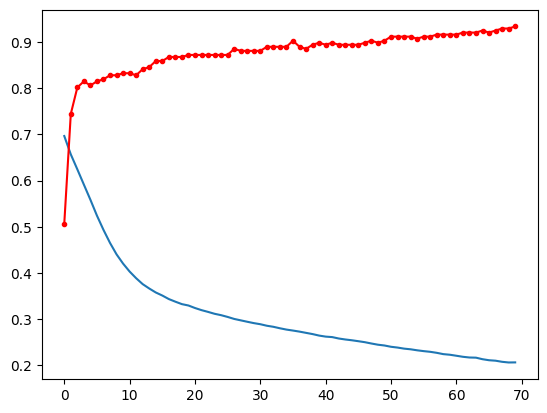

In [136]:
y_loss = historyA.history['loss']
y_accu = historyA.history['binary_accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len,y_loss)
plt.plot(x_len,y_accu, marker='.', c="red")

plt.show()

In [137]:
A=X_test.iloc[3,0:].to_numpy()

In [138]:
B=A.reshape(1, 13)

In [139]:
model.predict(B,verbose=0)#[:10]

array([[0.26920822]], dtype=float32)

In [140]:
model.predict(X_test,verbose=0)[:10]

array([[0.38074937],
       [0.98242015],
       [0.5800135 ],
       [0.26920822],
       [0.99007434],
       [0.10224134],
       [0.7646563 ],
       [0.9880693 ],
       [0.857323  ],
       [0.7827502 ]], dtype=float32)

# **2. Validation set을 사용하여 과적합 확인**

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random

random.seed(5)

model = Sequential()                                                  # 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])  # 딥러닝 모델을 실행합니다.

history=model.fit(X_train, y_train, validation_split=0.25, epochs=70, batch_size=16, verbose=1)

Epoch 1/70
11/11 [==============================] - 3s 66ms/step - loss: 0.8509 - binary_accuracy: 0.4353 - val_loss: 0.7547 - val_binary_accuracy: 0.5088
Epoch 2/70
11/11 [==============================] - 0s 17ms/step - loss: 0.7913 - binary_accuracy: 0.4353 - val_loss: 0.7146 - val_binary_accuracy: 0.5088
Epoch 3/70
11/11 [==============================] - 0s 24ms/step - loss: 0.7390 - binary_accuracy: 0.4353 - val_loss: 0.6824 - val_binary_accuracy: 0.5088
Epoch 4/70
11/11 [==============================] - 0s 22ms/step - loss: 0.6959 - binary_accuracy: 0.4353 - val_loss: 0.6558 - val_binary_accuracy: 0.5263
Epoch 5/70
11/11 [==============================] - 0s 38ms/step - loss: 0.6583 - binary_accuracy: 0.5235 - val_loss: 0.6313 - val_binary_accuracy: 0.6140
Epoch 6/70
11/11 [==============================] - 0s 48ms/step - loss: 0.6269 - binary_accuracy: 0.6176 - val_loss: 0.6102 - val_binary_accuracy: 0.7193
Epoch 7/70
11/11 [==============================] - 0s 20ms/step - los

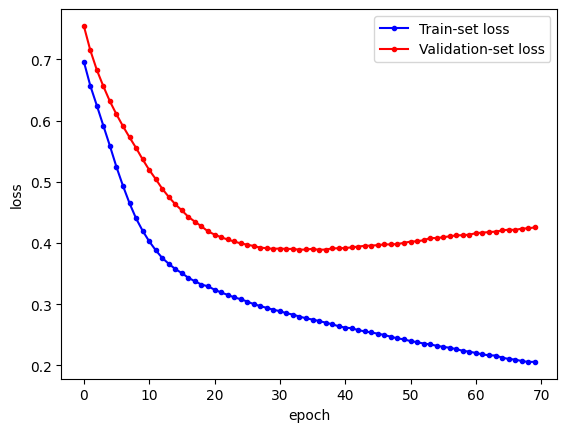

In [142]:
y_val_loss = history.history['val_loss']

plt.plot(x_len,y_loss, marker='.', c="blue", label='Train-set loss')
plt.plot(x_len,y_val_loss, marker='.', c="red",label='Validation-set loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

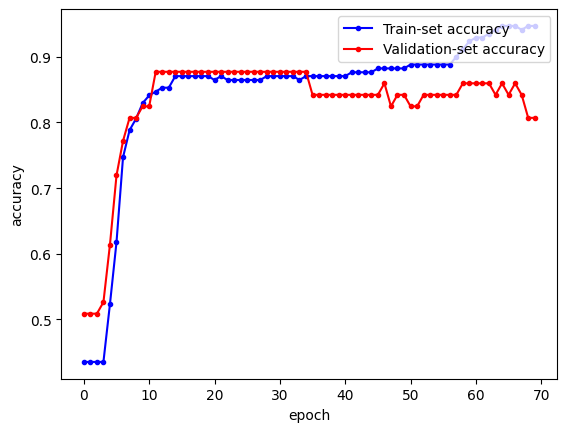

In [143]:
y_accu = history.history['binary_accuracy']
y_val_accu = history.history['val_binary_accuracy']

plt.plot(x_len,y_accu, marker='.', c="blue", label='Train-set accuracy')
plt.plot(x_len,y_val_accu, marker='.', c="red",label='Validation-set accuracy')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [144]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4815 - binary_accuracy: 0.7763


[0.4814673960208893, 0.7763158082962036]